In [121]:
import json
from glob import glob
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.feature_extraction
import sklearn.pipeline

In [122]:
import matplotlib.pyplot as plt
%matplotlib nbagg

import numpy as np

In [123]:
def chunker(lines):
    
    chunks = []
    chunk = ''
    speaker_id = lines[0]['speaker_id']
    
    for line in lines:
        if speaker_id == line['speaker_id']:
            chunk = chunk + ' ' + line['best_text']
        else:
            chunks.append(chunk)
            chunk = line['best_text']
            speaker_id = line['speaker_id']
            
    chunks.append(chunk)
    return chunks

In [179]:
files = sorted(glob('/home/bmcfee/data/data-*/transcripts/json/*.json'))

In [180]:
docs = []
for file in files:
    data = json.load(open(file, 'r'))
    docs.extend(chunker(data['lines']))

In [181]:
len(docs)

4892

In [420]:
import spacy

In [422]:
nlp = spacy.load('en')

In [432]:
def nounify(doc):
    
    return ' '.join([chunk.lemma_ for chunk in nlp(doc).noun_chunks])

In [433]:
docs[0]

" My name is Brian have broke today's June ninth we're at the newest breach of the Brooklyn public library. I'm joined by Barbara Hobson for our streets our story."

In [434]:
nounify(docs[0])

"my name today 's june ninth the new breach the brooklyn public library our street"

In [443]:
P = sklearn.pipeline.Pipeline( [('counts', sklearn.feature_extraction.text.CountVectorizer(strip_accents='ascii',
                                                                                           min_df=10,
                                                                                           #max_df=0.5,
                                                                                           stop_words='english')),
                                
                                ('LDA', sklearn.decomposition.LatentDirichletAllocation(n_topics=12,
                                                                                        max_iter=100,
                                                                                        learning_method='batch'))])

In [435]:
noundocs = [nounify(_) for _ in docs]

In [444]:
#y = P.fit_transform(docs)
y = P.fit_transform(noundocs)

In [445]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    print()

In [446]:
counter = P.steps[0][1]

In [447]:
# TODO: normalize topic word distributions by global frequencies

<IPython.core.display.Javascript object>


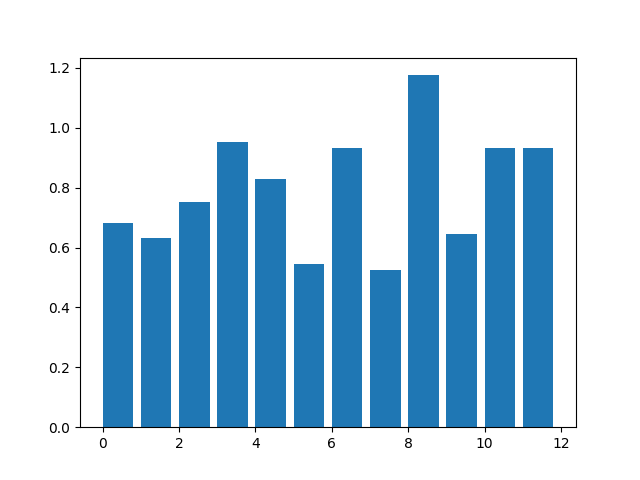

<Container object of 12 artists>

In [448]:
plt.figure()
plt.bar(np.arange(y.shape[1]), np.mean(y, axis=0))

In [449]:
print("\nTopics in LDA model:")
n_top_words = 20
tf_feature_names = P.steps[0][1].get_feature_names()
print_top_words(P.steps[1][1], tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
book life thing space love point kind word little poem moment year future end mind way conversation question interesting dog

Topic #1:
right government law political fact power state reason people local issue good civil great president federal citizen role social deal

Topic #2:
house father room mother place little door moment time apartment music car home leg bed night hand glass wall table

Topic #3:
people lot year neighborhood thing time community street friend city town place different store sense experience group change family good

Topic #4:
man people white problem building case negro community thing lot court block area class issue list thousand view city world

Topic #5:
language word world people thing certain play different question way english accent country place video baby speaker culture dream irish

Topic #6:
school kid child parent mom high thing time job student college girl memory little game good young day brother everybody

Topic 

In [452]:
P.transform(['the quick brown fox jumped over the lazy dog'])

array([[ 1.08332986,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333455,  0.08333559,
         0.08333333,  0.08333333]])

In [453]:
P.transform(['the president voted to leave the united kingdom'])

array([[ 0.08333349,  1.08332928,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333722]])

In [454]:
P.transform(['david bowie rock opera symphony brian eno'])

array([[ 0.08333333,  0.08333333,  1.08332852,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333815,  0.08333333,
         0.08333333,  0.08333333]])

In [455]:
P.transform(['film criticism is a waste of time'])

array([[ 0.08333403,  0.08333406,  0.08333481,  0.08333521,  0.0833334 ,
         0.08333333,  0.08333487,  0.08333452,  0.08333531,  3.08331994,
         0.08333386,  0.08333666]])

In [456]:
P.transform(['FILM CRITICISM IS A WASTE OF TIME'])

array([[ 0.08333403,  0.08333406,  0.08333481,  0.08333521,  0.0833334 ,
         0.08333333,  0.08333487,  0.08333452,  0.08333531,  3.08331994,
         0.08333386,  0.08333666]])

In [450]:
import pickle

In [451]:
pickle.dump({'pipeline': P}, open('/home/bmcfee/git/nypl-openaudio-discovery-topics/base-model.pkl', 'wb'))